In [1]:
import torch
import numpy as np
import os
import torchvision
import torchvision.datasets
import torchvision.transforms
import torch.utils.data
#from matplotlib import pyplot as plot
import matplotlib.pyplot as plt
import math

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


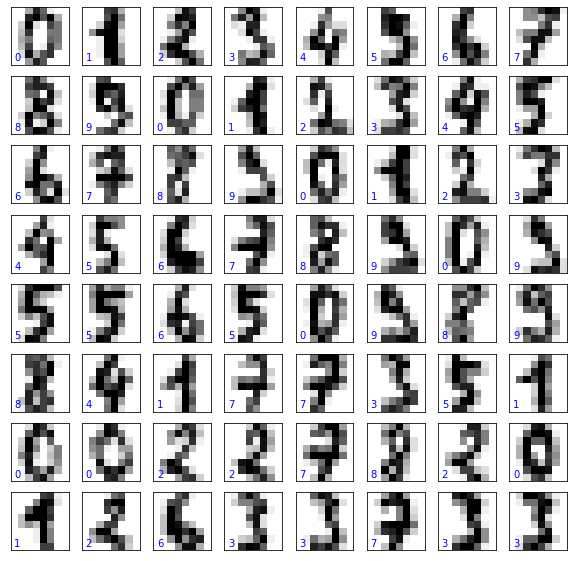

In [5]:
plt.figure(figsize = (10, 10)) # Размер окна в дюймах
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(X[i, :], (8, 8)), interpolation = 'nearest')
    plt.text(0, 7, str(digits.target[i]), color = 'b')
    plt.set_cmap('binary')

In [6]:

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, 
                                                    random_state = 7)


In [7]:
print(X_train.shape)
print(y_train.shape)

(1203, 64)
(1203,)


In [8]:
X_train1 = X_train[0:100]
y_train1 = y_train[0:100]
print(X_train1.shape)

(100, 64)


In [9]:
def basic_sigmoid(x):
    s = 1/(1+math.exp(-x))
    return s

In [10]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [11]:
def basic_sigmoiddif(x):
    s = []
    for i in range (len(x)):
        s.append(x[i]*(1-x[i]))
    return s

In [14]:
def NeuralNetFit(X, Y):
    
    rho = 0
    nepoch = 100
    m1 = 100
    N, d = X.shape
    K = Y.shape[0]
    o = 10

    W = np.random.randn(m1, d)
    W
    V = np.random.randn(o, m1)
    w = np.random.randn(m1)
    v = np.random.randn(K)
    
  
    for epoch in range(nepoch):
        for i in range(N):
            x = X[i, :]
            y = Y[i]
            
            # Прямой ход
            s = W.dot(x)+w

            z = [ ]
            for i in range(100):
                z.append(basic_sigmoid(s[i])) #sigmoid(s) 
            print(len(V))
            t = V@z + v
            
            g = softmax(t)
            
            # Обратный ход
            delta_t = g - y
            delta_z = delta_t@V
            delta_s = delta_z*basic_sigmoiddif(z)
            
            W = W - rho*np.outer(delta_s, x)
            V = V - rho*np.outer(delta_t, z)
            w = w - rho*delta_s
            v = v - rho * delta_t
            
    return W,w,V,v

In [15]:
W,w,V,v=NeuralNetFit(X_train1, y_train1)

10


ValueError: operands could not be broadcast together with shapes (10,) (100,) 

In [ ]:
W = np.random.randn(3, 3)
W

In [ ]:
print(W.shape)

In [ ]:
print(X_train1.shape)

In [ ]:
res = []
for i in range(100):
    x = X_train1[i, :]
    y = y_train1[i]
            

    # Прямой ход
    s = W.dot(x)+w
    z = [ ]
    for i in range(100):
        z.append(basic_sigmoid(s[i])) #sigmoid(s) 
          
    t = V@z + v
    g = softmax(t)
    res.append(g)

In [ ]:
len(res)

In [ ]:
res

In [ ]:
a = V@basic_sigmoid(W@X+w)+v

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_train1,res)